In [1]:
library("dplyr")
library("utils")
library("Amelia")
library("VIM")
library("openxlsx")
library("psych")
library("dummies")

Warning message:
"package 'dplyr' was built under R version 3.5.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'Amelia' was built under R version 3.5.2"Loading required package: Rcpp
Warning message:
"package 'Rcpp' was built under R version 3.5.2"## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2019 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 
Warning message:
"package 'VIM' was built under R version 3.5.2"Loading required package: colorspace
Warning message:
"package 'colorspace' was built under R version 3.5.2"Loading required package: grid
Loading required package: data.table
Warning message:
"package 'data.table' was built under R version 3.5.2"
Attaching package: 'data.table'

The foll

In [4]:
melbourne.data <- read.csv("D:melbourne.csv", header = TRUE,
                    stringsAsFactors = FALSE, strip.white = TRUE, sep = ",",
                    na.strings = c("","NA"))

In [6]:
str(melbourne.data)
summary(melbourne.data)

'data.frame':	14246 obs. of  19 variables:
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "68 Studley St" "85 Turner St" "25 Bloomburg St" "18/659 Victoria St" ...
 $ Rooms       : int  2 2 2 3 3 3 4 4 2 2 ...
 $ Type        : chr  "h" "h" "h" "u" ...
 $ Price       : int  NA 1480000 1035000 NA 1465000 850000 1600000 NA NA NA ...
 $ Method      : chr  "SS" "S" "S" "VB" ...
 $ SellerG     : chr  "Jellis" "Biggin" "Biggin" "Rounds" ...
 $ Date        : chr  "3/09/2016" "3/12/2016" "4/02/2016" "4/02/2016" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  2 2 2 3 3 3 3 3 4 3 ...
 $ Bathroom    : int  1 1 1 2 2 2 1 2 1 2 ...
 $ Car         : int  1 1 0 1 0 1 2 2 2 1 ...
 $ Landsize    : int  126 202 156 0 134 94 120 400 201 202 ...
 $ BuildingArea: num  NA NA 79 NA 150 NA 142 220 NA NA ...
 $ YearBuilt   : int  NA NA 1900 

    Suburb            Address              Rooms            Type          
 Length:14246       Length:14246       Min.   : 1.000   Length:14246      
 Class :character   Class :character   1st Qu.: 2.000   Class :character  
 Mode  :character   Mode  :character   Median : 3.000   Mode  :character  
                                       Mean   : 2.894                     
                                       3rd Qu.: 3.000                     
                                       Max.   :12.000                     
                                       NA's   :24                         
     Price            Method            SellerG              Date          
 Min.   :  85000   Length:14246       Length:14246       Length:14246      
 1st Qu.: 640000   Class :character   Class :character   Class :character  
 Median : 900000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1076961                                                           
 3rd Qu.:1330500    

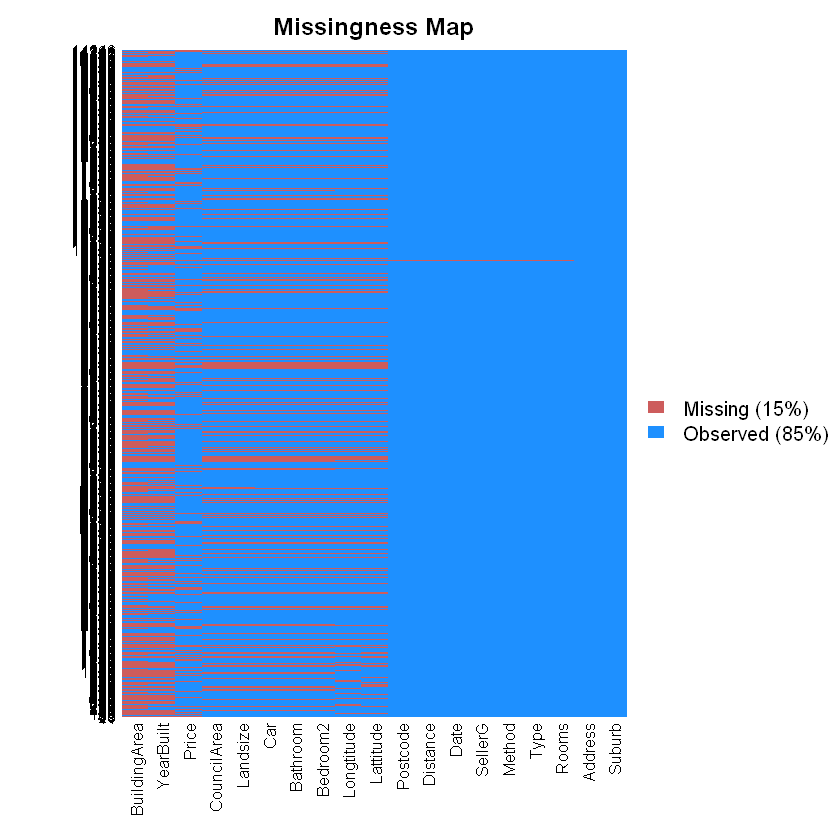

In [7]:
library("Amelia")
 missmap(melbourne.data)

Warning message in plot.aggr(res, ...):
"not enough vertical space to display frequencies (too many combinations)"

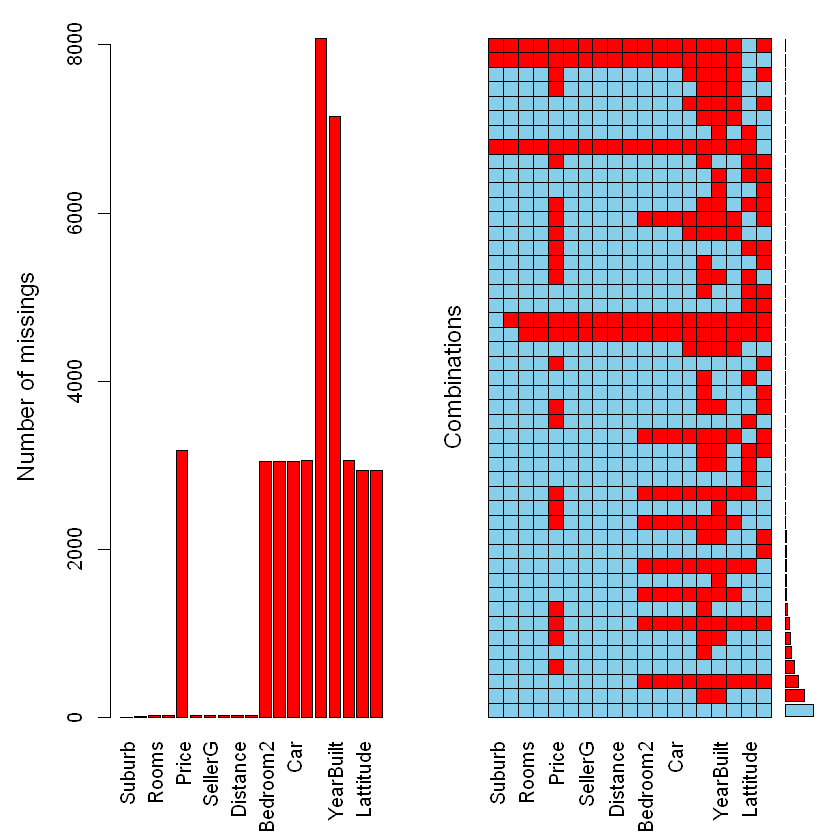

In [11]:
library("VIM")
aggr(melbourne.data,prop=F,numbers=T)

In [48]:

 table(melbourne.data$Bedroom2)
melbourne.data$Bedroom2[is.na(melbourne.data$Bedroom2)]<- 3



   0    1    2    3    4    5    6    7    8    9   20   30 
  13  667 3490 7637 1930  448   42    8    5    4    1    1 

In [21]:
#3 - 4593 is high occurence in bedroom2
melbourne.data$Bedroom2[is.na(melbourne.data$Bedroom2)]<- 3
melbourne.data$Bedroom2

[1]  2  2  2  3  3  3  3  3  4  3  2  4  2  6  2  3  3  1  3  3  2  3  3  2
   [25]  3  2  3  3  2  1  2  3  3  3  3  2  3  2  4  3  3  3  2  2  2  3  3  3
   [49]  1  3  1  2  3  4  3  3  3  1  2  3  3  2  3  2  3  3  3  3  3  3  2  3
   [73]  2  2  3  3  3  3  3  2  3  6  2  2  3  2  3  3  3  3  3  3  3  3  2  3
   [97]  3  3  3  3  3  2  3  2  3  3  5  3  3  3  3  3  2  3  3  3  3  2  3  3
  [121]  4  3  3  3  3  3  3  3  4  4  3  3  3  2  2  3  3  2  2  2  1  2  4  3
  [145]  3  3  3  2  3  3  3  2  3  5  3  3  2  2  3  2  2  2  3  3  3  3  3  3
  [169]  4  3  2  3  2  3  2  7  3  1  4  2  3  3  3  3  3  2  2  2  4  3  3  3
  [193]  3  1  3  3  3  3  3  3  3  4  5  5  2  2  2  3  3  3  3  3  3  2  4  4
  [217]  3  2  0  2  3  4  3  3  3  3  4  5  3  4  3  5  2  3  4  4  2  2  3  3
  [241]  3  2  3  3  2  4  2  3  3  2  2  4  3  3  3  3  3  3  2  2  3  3  2  3
  [265]  3  3  3  3  3  3  4  4  3  3  2  3  2  3  3  3  3  4  2  3  5  3  3  3
  [289]  3  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  3  3
  [313]  3  2  4  3  3  3  3  3  3  3  3  3  3  4  3  3  3  3  3  3  3  3  3  1
  [337]  3  3  3  4  5  3  3  3  3  3  3  2  3  3  4  3  3  4  3  4  4  3  3  3
  [361]  3  2  3  3  2  2  2  3  3  3  3  3  1  3  3  3  4  2  2  3  3  1  2  3
  [385]  3  2  2  3  4  3  8  4  3  2  2  4  2  2  3  3  2  3  1  1  4  2  3  2
  [409]  3  2  4  3  2  3  1  3  3  3  4  3  1  3  2  3  3  3  5  2  3  3  3  2
  [433]  1  3  2  2  3  3  2  2  3  2  3  3  3  3  3  2  2  1  2  3  1  2  2  2
  [457]  3  3  4  3  2  1  3  3  3  4  4  3  3  2  2  4  3  2  3  3  2  3  5  3
  [481]  1  2  3  2  3  3  3  2  3  3  3  2  4  3  3  2  6  2  3  2  3  3  2  2
  [505]  2  3  2  3  4  2  3  3  2  3  3  4  2  4  3  3  2  2  3  4  3  3  3  1
  [529]  3  3  3  3  3  4  3  3  2  4  4  2  3  3  3  3  4  2  3  5  2  2  2  2
  [553]  3  3  6  2  2  4  2  2  4  3  3  3  3  3  4  3  3  2  4  3  3  3  3  3
  [577]  3  2  3  2  3  3  3  4  4  3  3  2  3  3  3  2  3  3  4  2  2  4  3  3
  [601]  3  3  3  2  2  3  3  3  3  3  3  3  3  3  3  3  9  4  3  3  3  3  3  3
  [625]  3  3  3  4  4  3  3  3  3  3  3  2  3  3  3  3  3  2  5  3  3  3  3  3
  [649]  3  3  6  4  3  3  3  2  3  3  3  4  3  3  4  3  3  3  2  4  3  5  4  3
  [673]  3  4  4  3  3  3  3  3  2  3  3  3  3  4  2  4  2  3  2  3  4  4  3  3
  [697]  3  3  3  3  3  4  2  3  3  4  3  3  2  3  5  3  3  4  2  3  3  2  3  4
  [721]  3  3  4  3  2  3  3  3  3  4  2  3  3  3  3  3  3  3  3  3  4  3  4  3
  [745]  3  2  3  3  3  3  3  4  3  4  3  3  4  2  3  3  3  3  4  3  3  3  3  3
  [769]  3  4  3  3  4  3  2  3  3  3  3  3  3  3  3  3  3  2  3  3  5  3  4  3
  [793]  3  3  3  3  3  2  3  4  3  2  3  3  3  3  3  4  3  3  3  3  2  4  4  3
  [817]  4  3  4  3  3  3  3  3  2  3  1  2  3  3  2  2  2  2  2  3  2  2  2  2
  [841]  3  3  2  3  1  2  3  2  4  2  3  3  3  5  4  3  5  2  6  2  5  3  3  4
  [865]  2  3  3  3  3  5  4  3  2  3  3  2  4  3  3  3  3  3  4  2  3  3  2  3
  [889]  3  3  2  3  3  3  3  2  1  3  3  3  4  2  3  4  3  3  5  5  3  3  4  3
  [913]  3  4  3  3  2  2  4  3  3  3  2  3  4  3  3  2  3  5  2  3  2  3  3  3
  [937]  3  3  3  3  2  4  3  3  5  5  3  5  3  5  4  3  3  3  4  2  2  4  3  3
  [961]  3  4  4  2  4  3  3  5  4  2  5  2  4  3  4  5  3  3  4  4  5  3  4  2
  [985]  4  3  2  3  4  5  3  3  3  3  3  5  3  4  4  2  3  2  3  3  5  3  3  6
 [1009]  3  2  3  3  4  2  3  3  7  4  5  4  3  5  3  3  4  3  7  3  3  4  3  4
 [1033]  4  4  3  4  3  4  3  3  4  3  4  3  3  4  4  3  4  4  2  3  4  3  5  4
 [1057]  5  3  4  4  3  4  3  3  4  4  3  4  3  4  4  3  4  2  2  3  4  3  5  3
 [1081]  4  4  5  3  3  3  2  3  3  5  5  3  3  5  3  5  3  4  4  3  3  4  3  3
 [1105]  4  5  4  3  4  3  3  3  3  3  4  3  4  2  2  3  4  4  3  3  3  4  4  5
 [1129]  3  4  3  4  4  3  3  3  2  2  5  6  4  3  5  3  3  4  4  2  3  5  3  5
 [1153]  3  2  4  5  3  3  2  3  4  3  3  4  6  3  3  5  5  4  3  3  3  3  3  3
 [1177]  3  3  2  3  3  3  3  4  2  2  3  5  5  7  5  3  3  3  3  2  4  3  3  4
 [12

In [29]:
#mean(d,na.rm=True) to calculate mean
mean(melbourne.data$Price,na.rm=TRUE)
#d[is.na(d)] <- 0 TO FILL NA VALUES syntax
melbourne.data$Price[is.na(melbourne.data$Price)]<-mean(melbourne.data$Price,na.rm=TRUE)

[1] 1076961

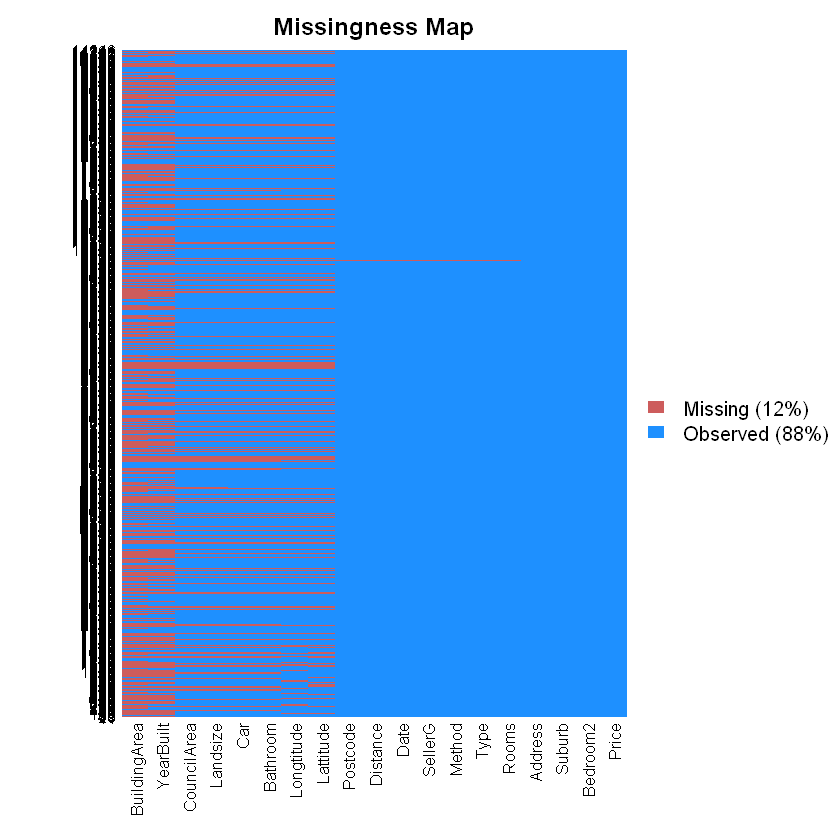

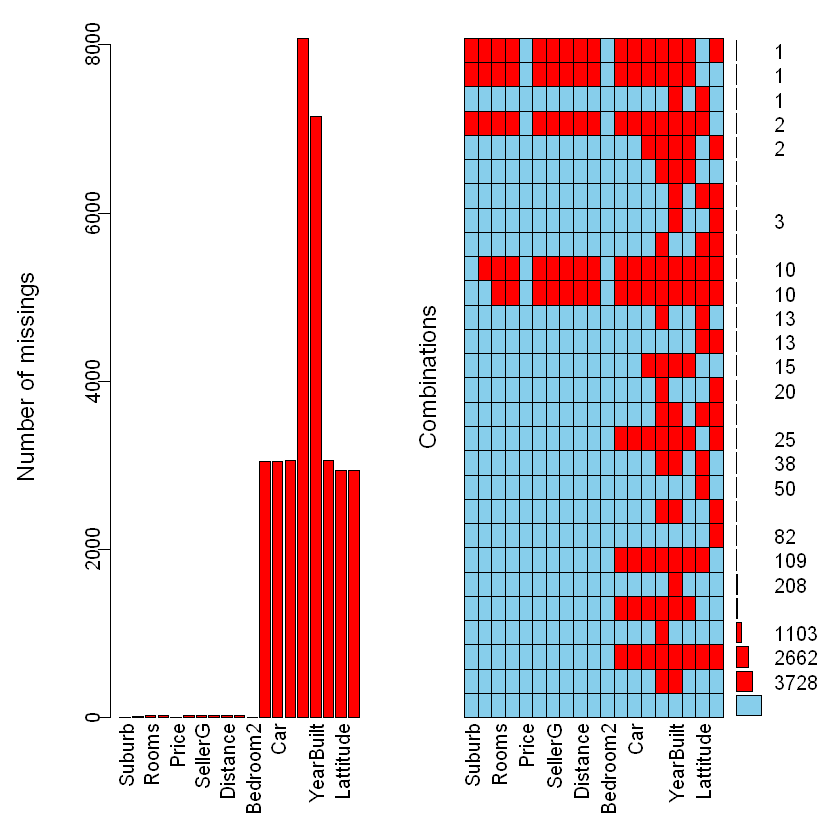

In [30]:
 missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)

[1] 469.1814

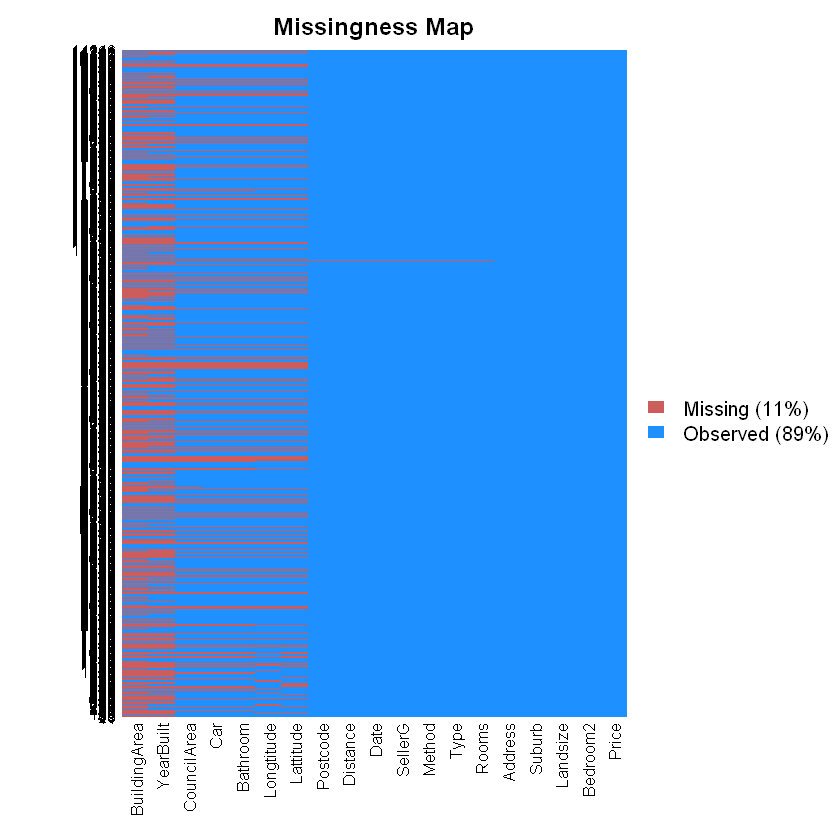

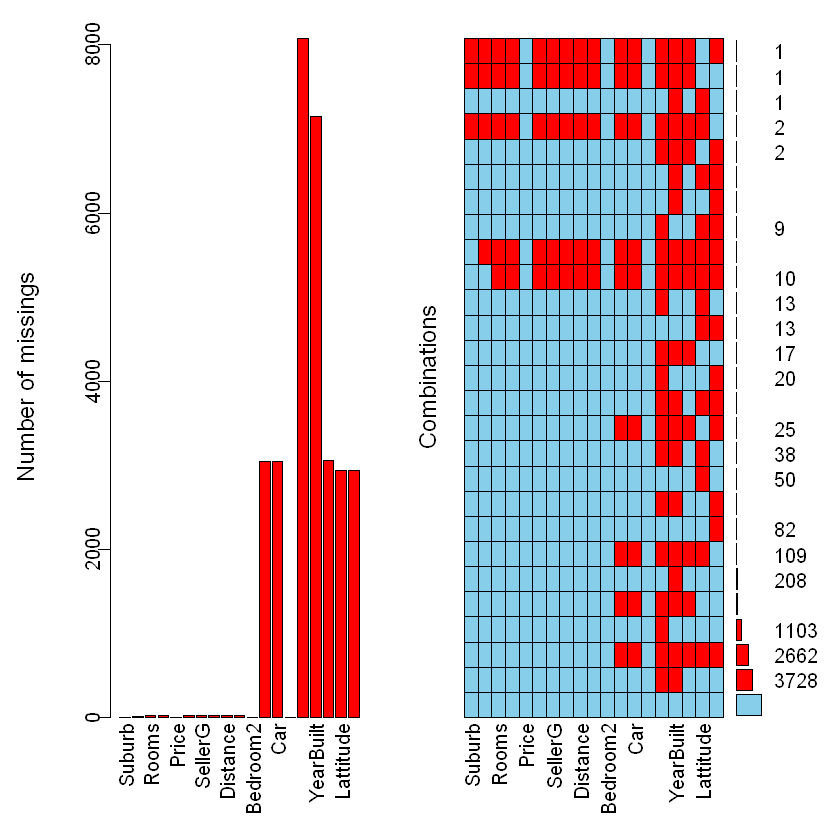

In [35]:
mean(melbourne.data$Landsize,na.rm=TRUE)
melbourne.data$Landsize[is.na(melbourne.data$Landsize)]<-mean(melbourne.data$Landsize,na.rm=TRUE)
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)


   h    t    u 
9104 1574 3568 

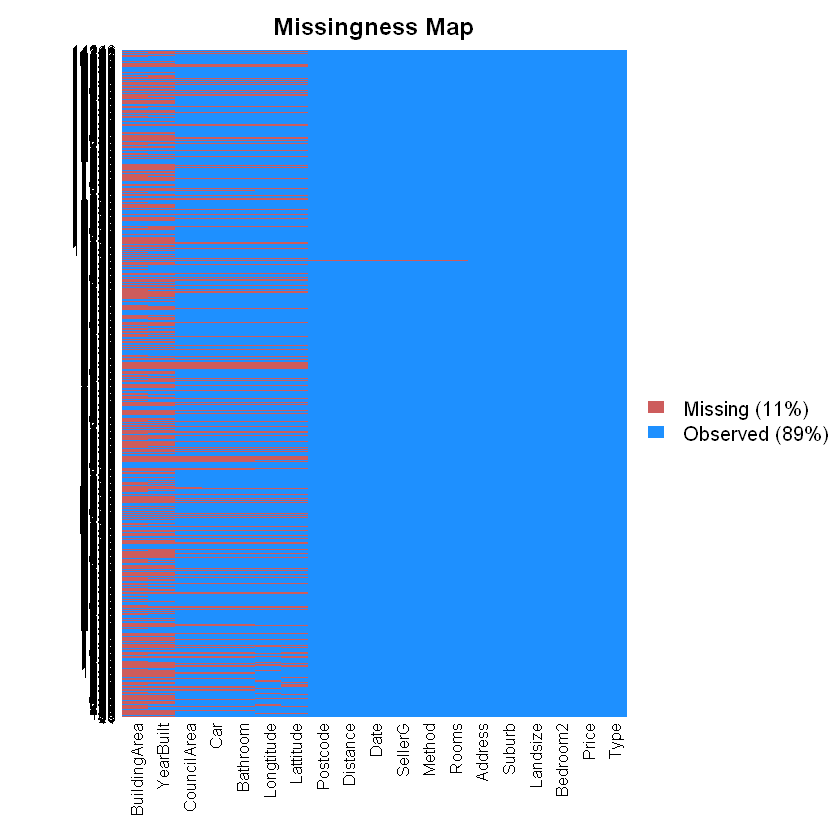

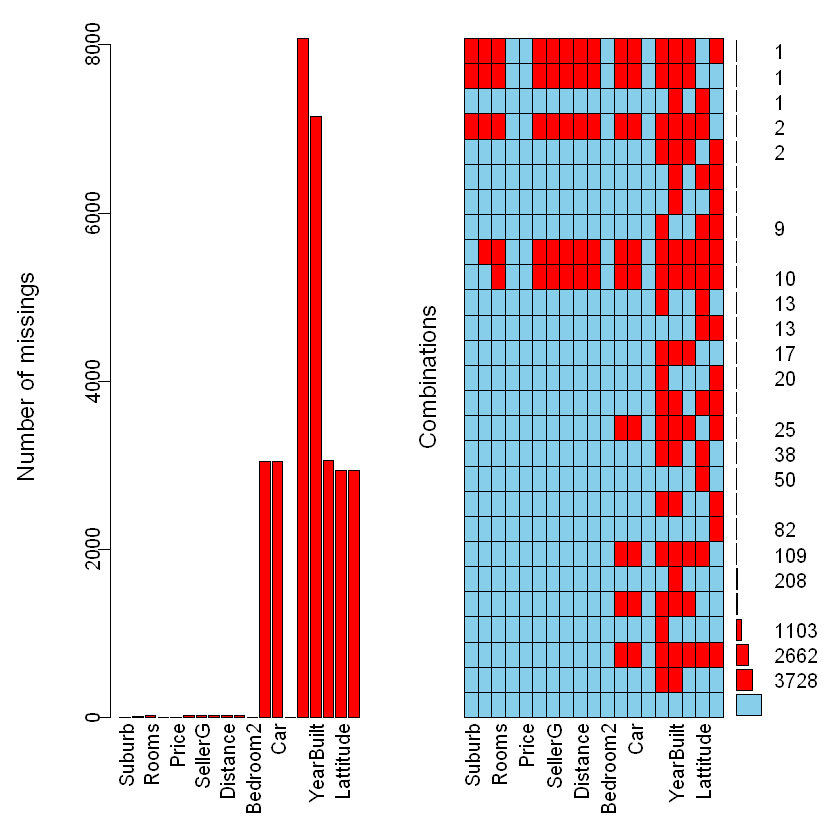

In [40]:
table(melbourne.data$Type)
melbourne.data$Type[is.na(melbourne.data$Type)]<-'h'
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)



  PI   PN    S   SA   SN   SP   SS   VB    W 
1883  121 8406   51  587 2013   12 1098   51 

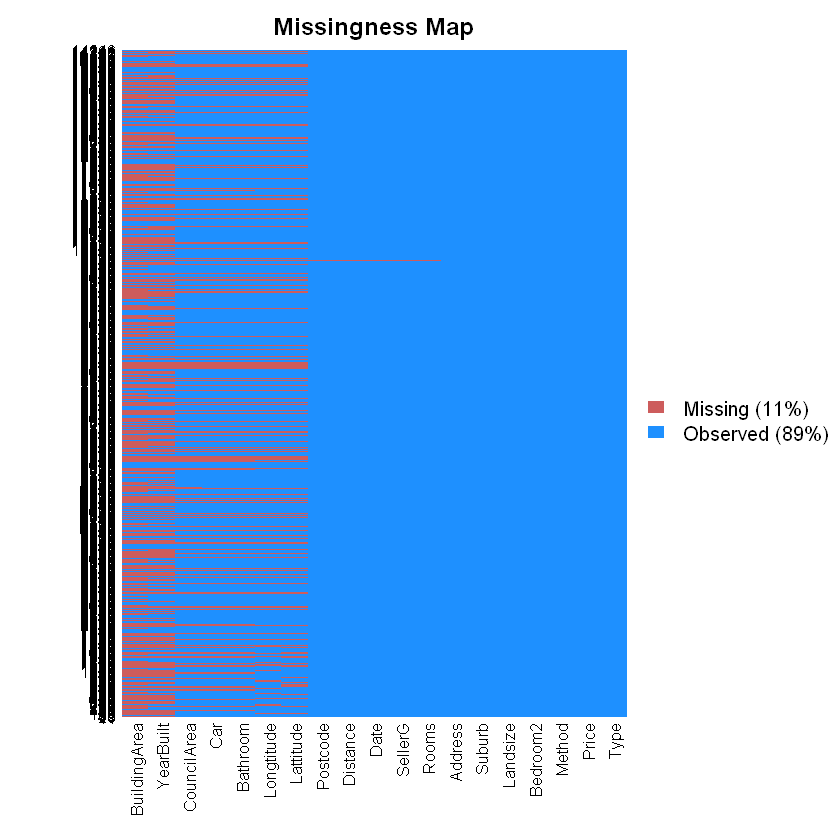

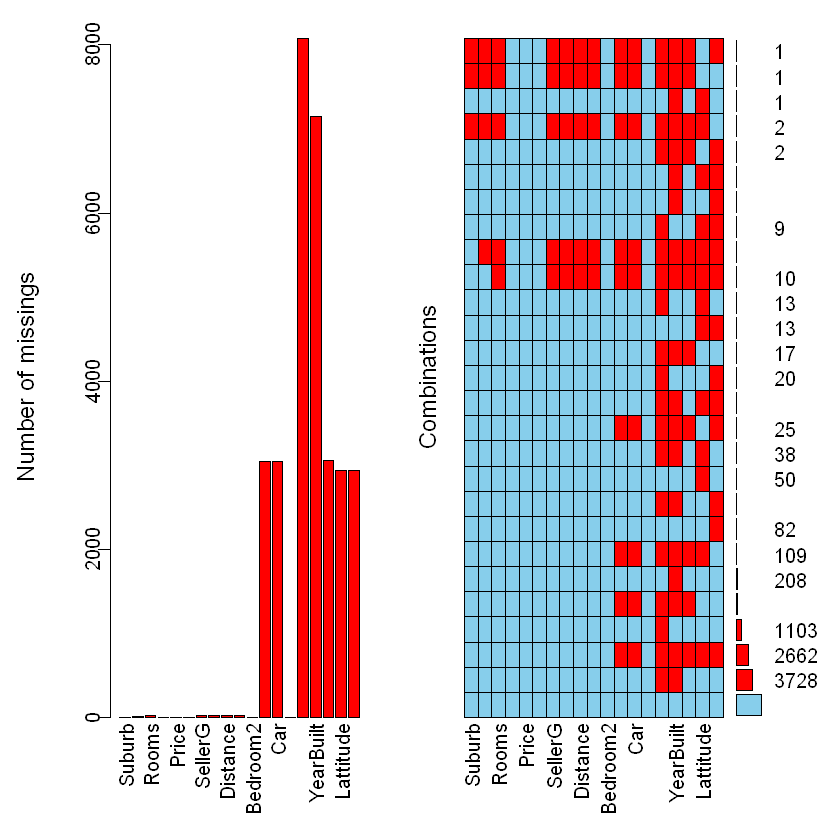

In [42]:
table(melbourne.data$Method)
melbourne.data$Method[is.na(melbourne.data$Method)]<-'s'
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)


   0    1    2    3    4    5    6    7    8   12 
  40 6319 3898  803  105   28    4    3    1    1 

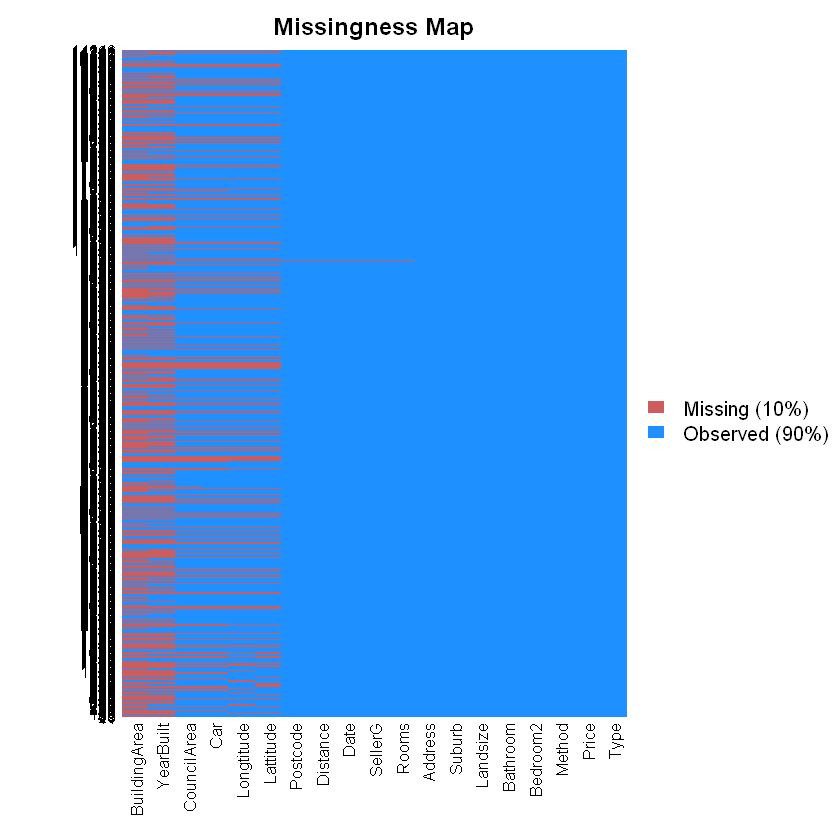

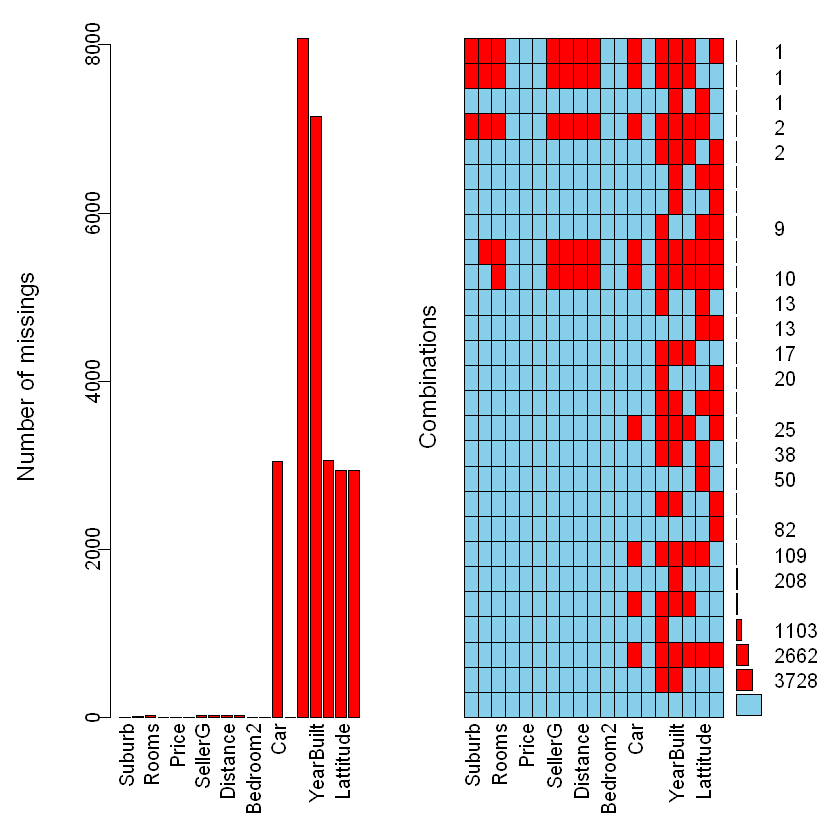

In [44]:
table(melbourne.data$Bathroom)
melbourne.data$Bathroom[is.na(melbourne.data$Bathroom)]<-1
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)


   0    1    2    3    4    5    6    7    8   11   26 
 954 7968 4307  557  373   41   30    8    6    1    1 

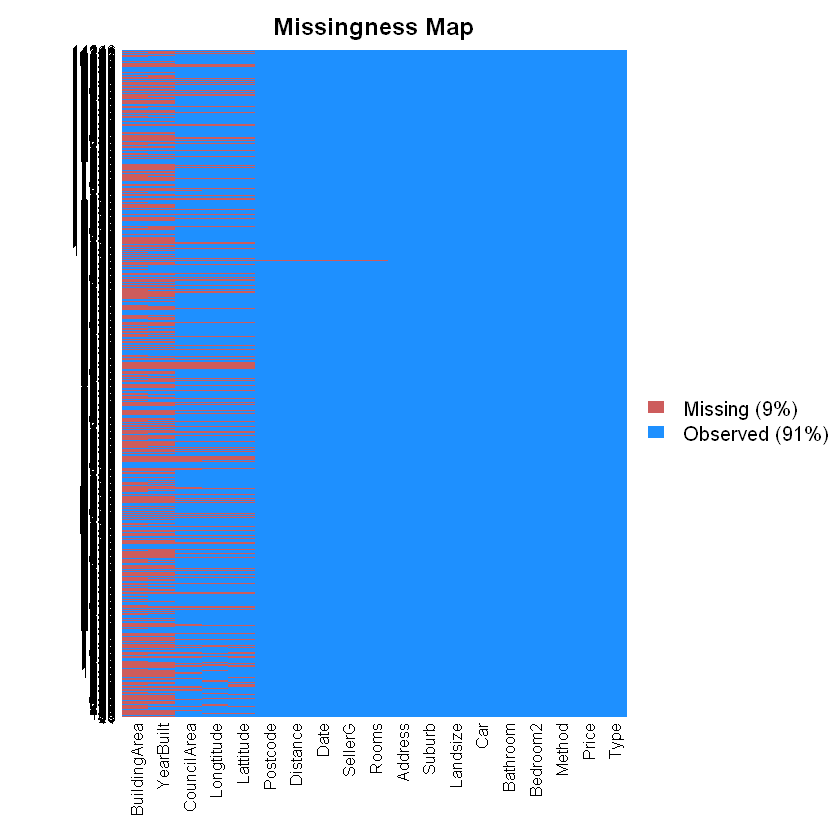

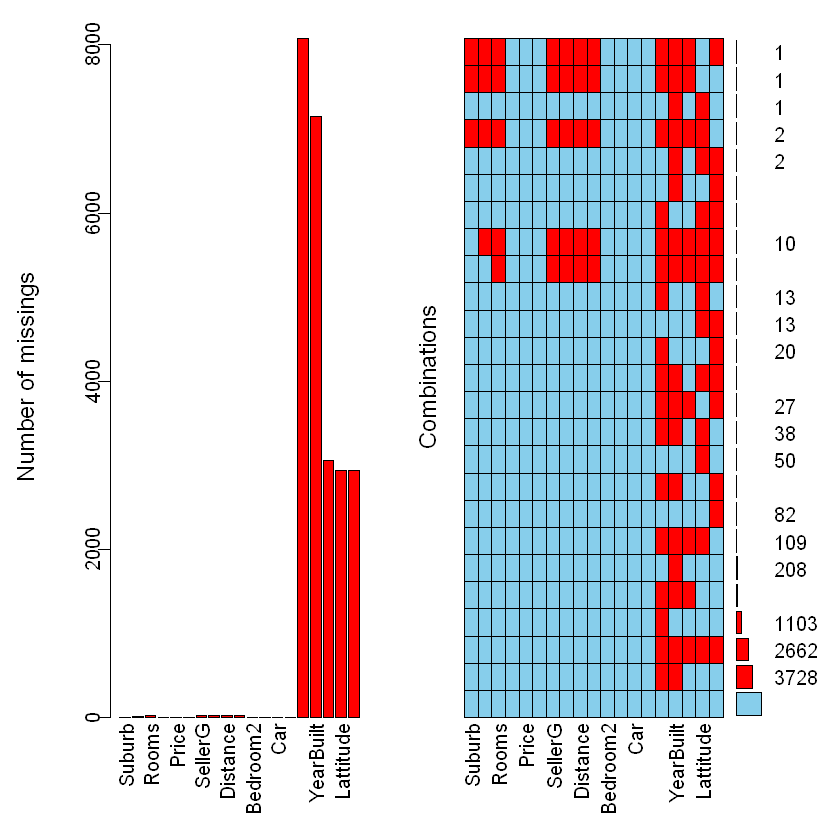

In [47]:
table(melbourne.data$Car)
melbourne.data$Car[is.na(melbourne.data$Car)]<-1
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)




   1    2    3    4    5    6    7    8    9   10   12 
 801 4197 5800 2707  629   60   10   11    2    3    2 

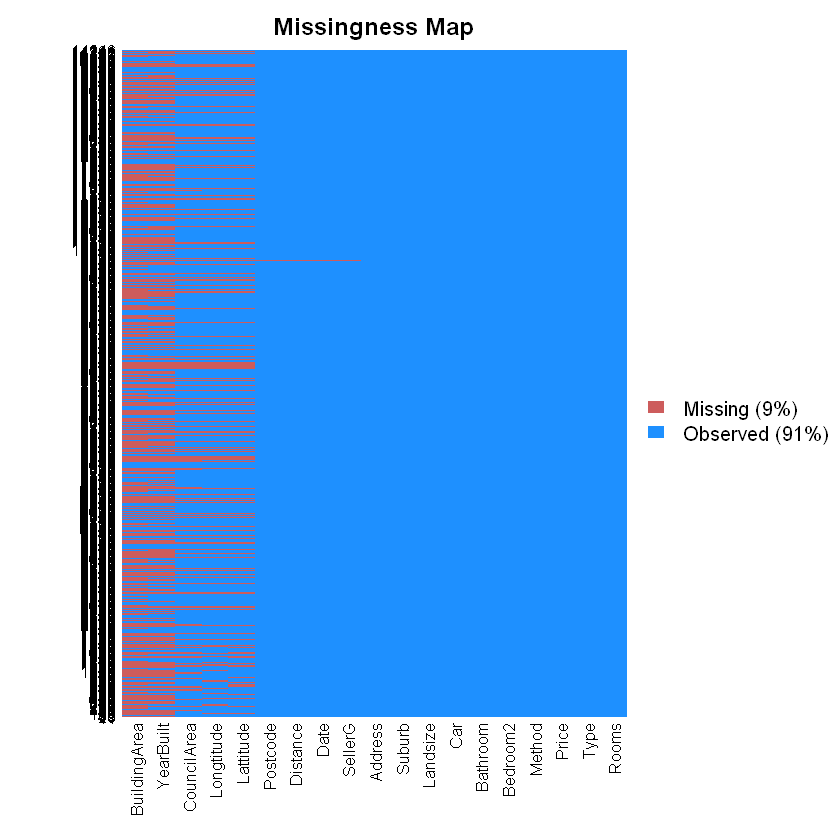

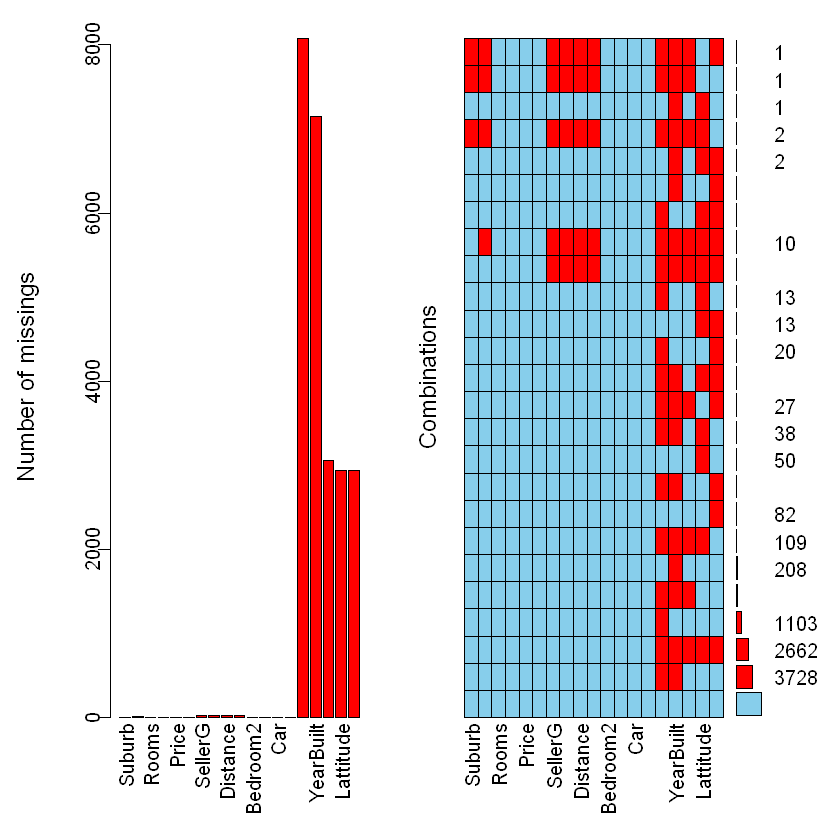

In [50]:
table(melbourne.data$Rooms)
melbourne.data$Rooms[is.na(melbourne.data$Rooms)]<-3
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)


[1] 146.8615

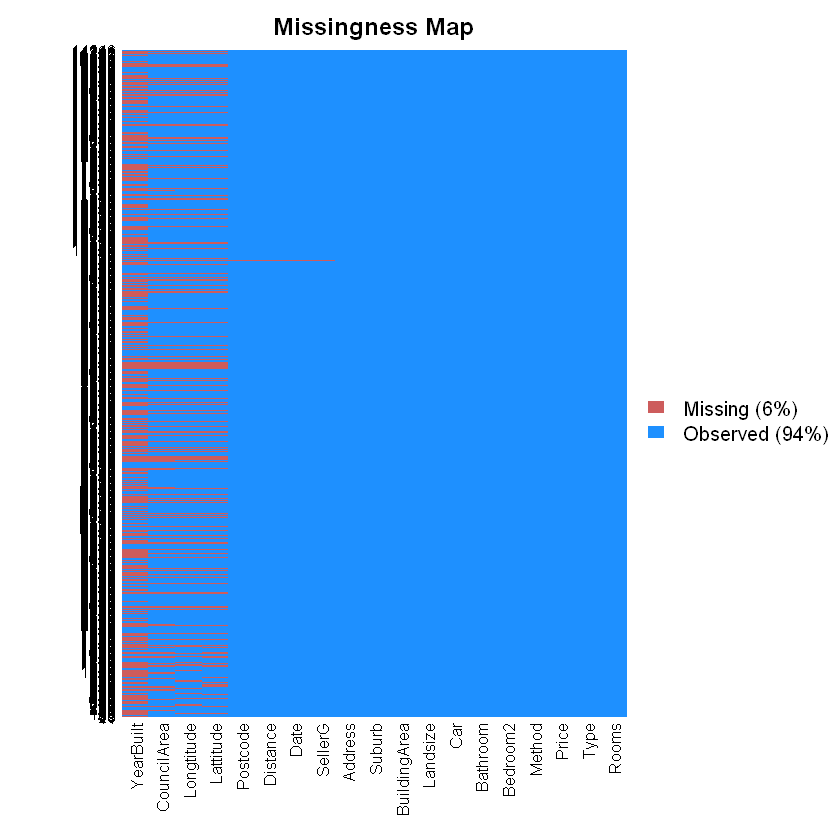

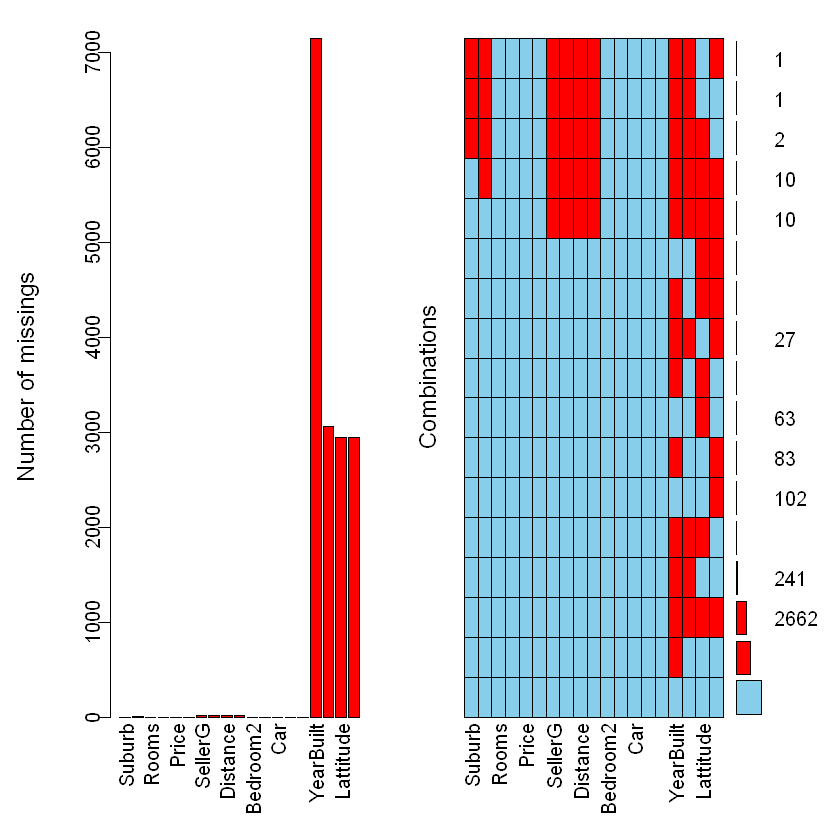

In [55]:
mean(melbourne.data$BuildingArea,na.rm=TRUE)
melbourne.data$BuildingArea[is.na(melbourne.data$BuildingArea)]<-mean(melbourne.data$BuildingArea,na.rm=TRUE)
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)



1800 1830 1850 1854 1856 1857 1860 1863 1868 1870 1872 1875 1876 1877 1880 1881 
   1    1    4    1    1    1    4    2    1    2    2    1    1    1   86    1 
1883 1884 1885 1886 1887 1888 1889 1890 1892 1893 1894 1895 1896 1897 1898 1900 
   1    1    8    4    3   10    1  253    1    2    1    4    1    1    2  365 
1901 1902 1903 1904 1905 1906 1907 1908 1910 1911 1912 1913 1914 1915 1916 1917 
   1    2    2    4   25    4    2    3  256    2    7    4    1   64    4    3 
1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 
   4    4  301    2    3    7    5  104    8    9   13    3  300    2    1    1 
1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1945 1946 1947 1948 1949 1950 
   7   57    1    4   20    5  229    5    1    4   34    3    4   15    5  536 
1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 
   5    3    4    1   77    7    7   10    3  580    4    5    7    4  131   15 
1967 1968 1969 1970 1971 19

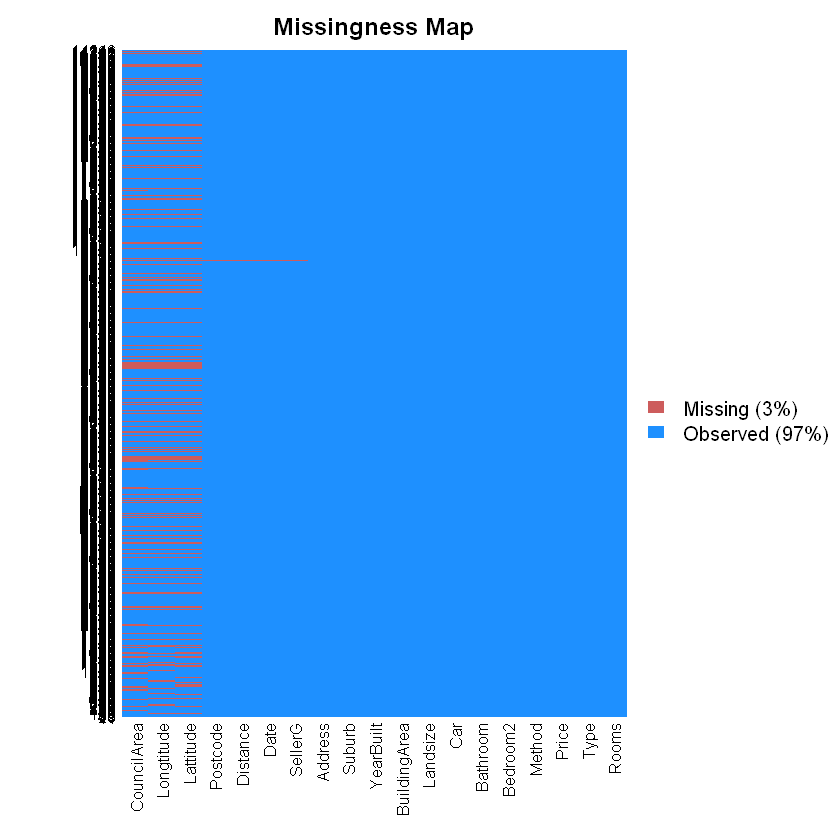

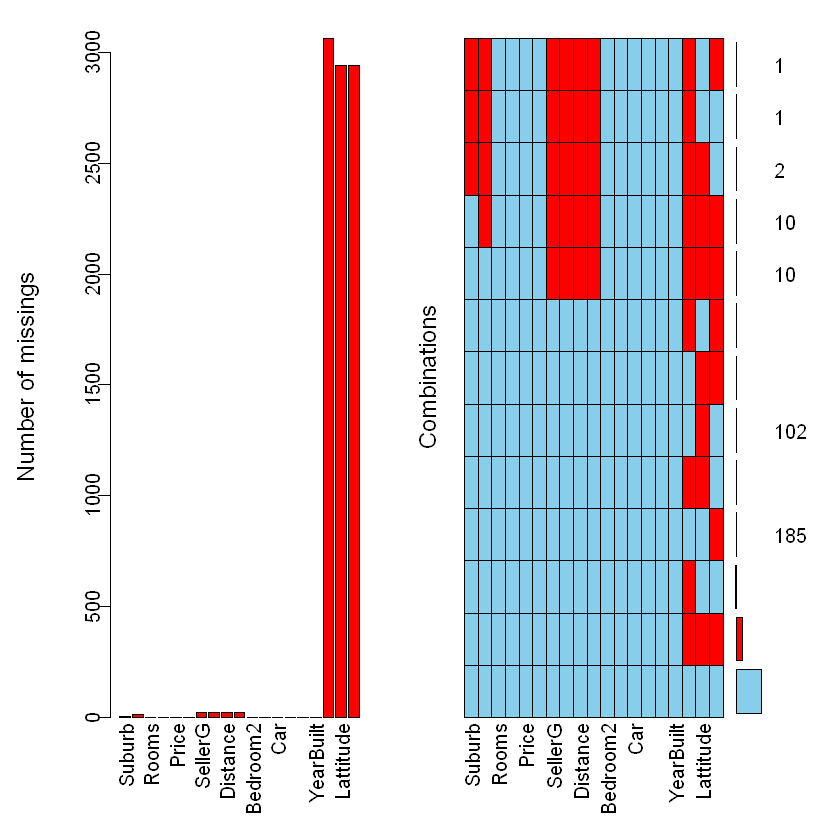

In [58]:
table(melbourne.data$YearBuilt)
melbourne.data$YearBuilt[is.na(melbourne.data$YearBuilt)]<-1970
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)

[1] 8.621635

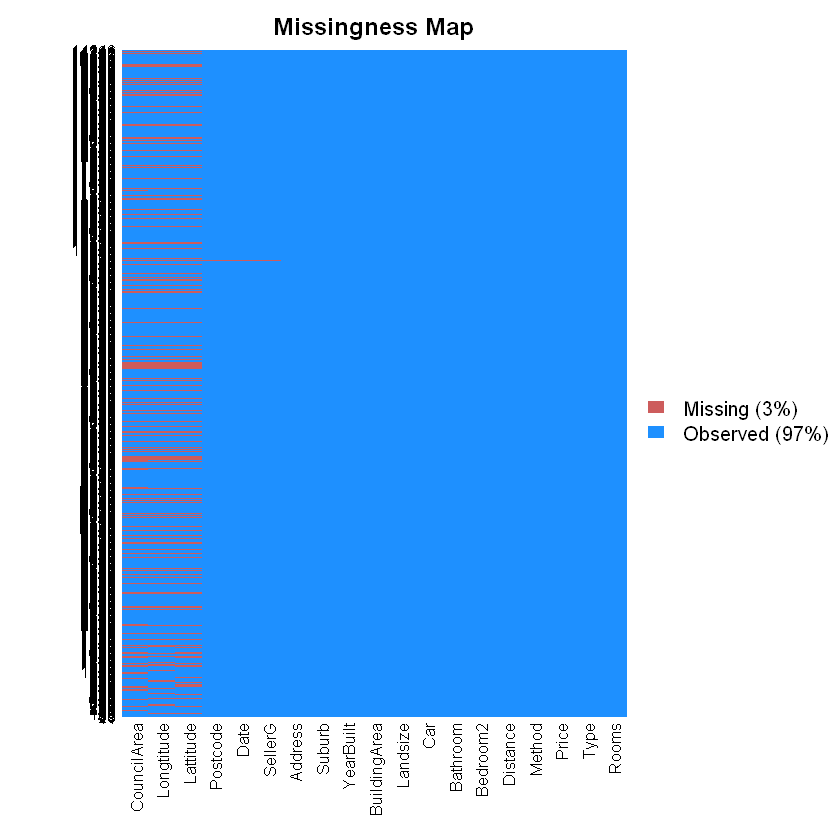

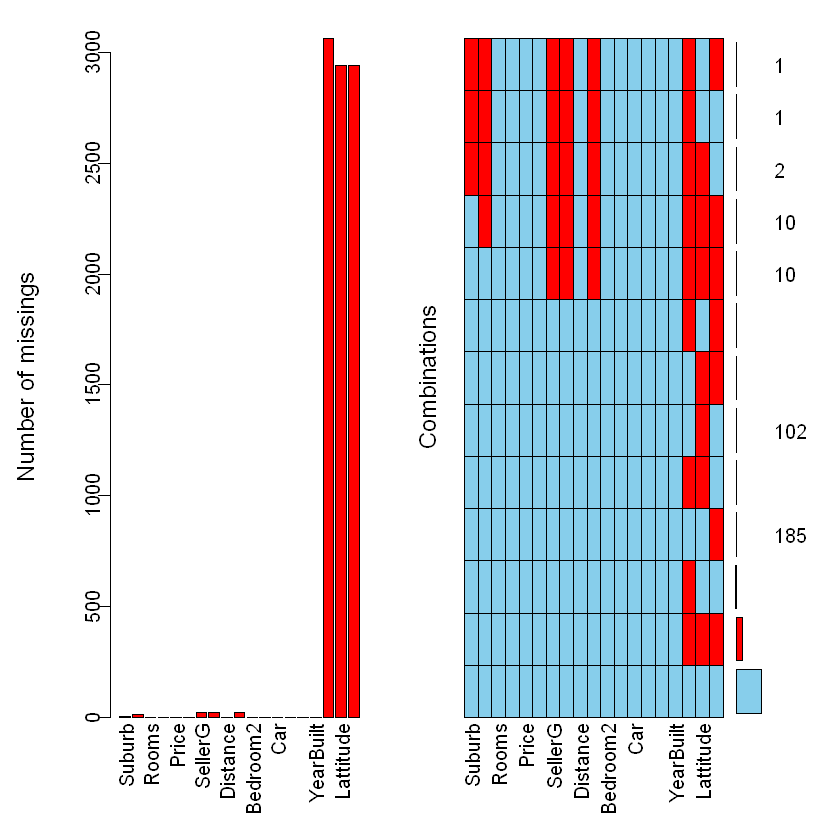

In [62]:
mean(melbourne.data$Distance,na.rm=TRUE)
melbourne.data$Distance[is.na(melbourne.data$Distance)]<-1970
missmap(melbourne.data)
aggr(melbourne.data,prop=F,numbers=T)

In [64]:
 modified.md <- melbourne.data[c(-1,-2,-7)]

In [65]:
summary(modified.md)

     Rooms            Type               Price            Method         
 Min.   : 1.000   Length:14246       Min.   :  85000   Length:14246      
 1st Qu.: 2.000   Class :character   1st Qu.: 707000   Class :character  
 Median : 3.000   Mode  :character   Median :1076961   Mode  :character  
 Mean   : 2.894                      Mean   :1076961                     
 3rd Qu.: 3.000                      3rd Qu.:1200000                     
 Max.   :12.000                      Max.   :8000000                     
                                                                         
     Date              Distance          Postcode       Bedroom2     
 Length:14246       Min.   :   1.20   Min.   :3000   Min.   : 0.000  
 Class :character   1st Qu.:   5.90   1st Qu.:3046   1st Qu.: 2.000  
 Mode  :character   Median :   8.80   Median :3085   Median : 3.000  
                    Mean   :  11.93   Mean   :3098   Mean   : 2.875  
                    3rd Qu.:  11.20   3rd Qu.:3146   3rd Q

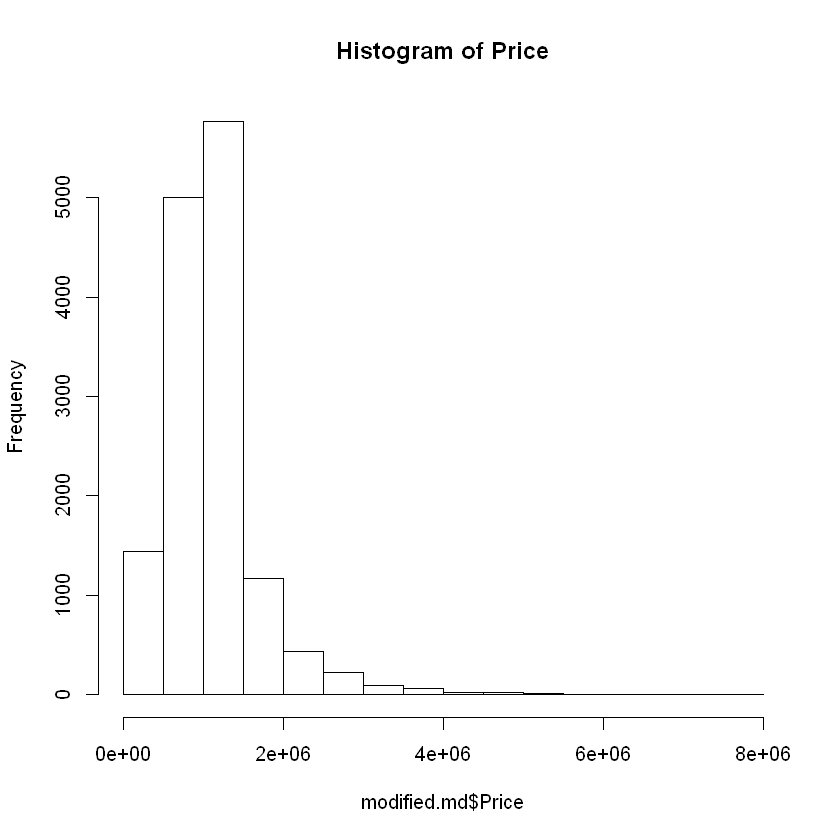

In [66]:
hist(modified.md$Price,     main = "Histogram of Price")

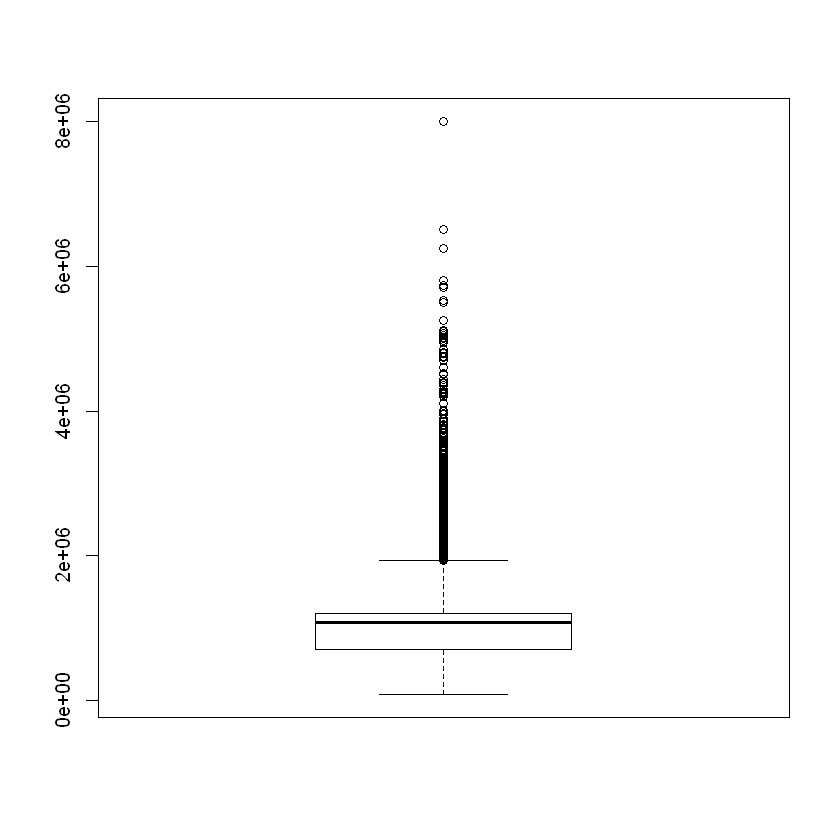

In [71]:
boxplot(melbourne.data$Price,PLOT=TRUE)



In [ ]:
 modified.md1 <- subset( modified.md, Price < 2250000)
boxplot(modified.md1$Price)
 str(modified.md1)
 summary(modified.md1)
